# Vectorizing Across Multiple Examples

---

<br>

Vectorization을 통해 하나의 훈련 샘플만이 아니라 <br>
전체 훈련 샘플을 한번에 계산할 수 있다. <br>

Logistic regression의 결과와 비슷하게 <br>
훈련 샘플을 행렬의 열(column)로 쌓아서 <br>
신경망의 모든 샘플에 대한 출력값을 동시에 계산할 수 있다. <br><br>

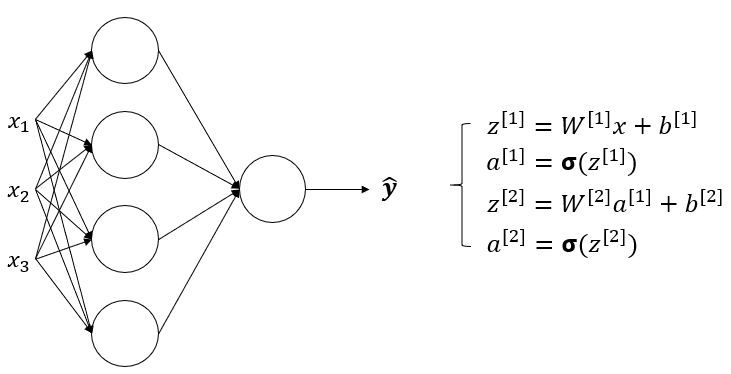


위의 식과 같이 입력 벡터 $x$가 주어졌을때, <br>
한 훈련샘플에 대해 $\hat{y}$인 $a^{[2]}$를 계산 해준다. <br><br>

$x$ ------------------> $a^{[2]} = \hat{y}$ <br><br>

훈련샘플이 $m$개 있다면 이 과정을 첫 훈련샘플인 $x^{(1)}$에 적용하여 <br>
첫 샘플의 예측값인 $\hat{y}^{(1)}$을 계산하고 $x^{(2)}$ 와 $x^{(m)}$까지 적용해서 $\hat{y}^{(2)}$... $\hat{y}^{(m)}$ 까지 계산해준다. <br><br>

$x^{(1)}$ --------------> $a^{[2](1)}$ = $\hat{y}^{(1)}$ <br>
$x^{(2)}$ --------------> $a^{[2](2)}$ = $\hat{y}^{(2)}$ <br>
$\vdots$ <br>
$x^{(m)}$ --------------> $a^{[2](m)}$ = $\hat{y}^{(m)}$ <br><br>


여기서 <font color=purple>$a^{[2](i)}$</font>와 같은 표기에서 소괄호 $(i)$는 $i$번째 훈련 샘플을 뜻하고, <br>
대괄호 $[2]$는 두번째 층(layer)을 의미한다. <br><br>



---


모든 훈련 샘플의 예측값을 Vectorization하지않은 방법으로 계산한다면 <br>
$i$가 1부터 $m$까지인 아래의 공식을 구현해야한다.<br>

for i = 1 to m: <br>

$\qquad$ $z^{[1](i)} = W^{[1]}x^{(i)} + b^{[1]}$ <br>
$\qquad$ $a^{[1](i)} = σ(z^{[1](i)})$ <br>
$\qquad$ $z^{[2](i)} = W^{[2]}a^{[1](i)} + b^{[2]}$ <br>
$\qquad$ $a^{[2](i)} = σ(z^{[2](i)})$ <br>

<br>
훈련샘플과 관련있는 모든 변수에 위첨자 $(i)$ 를 붙여주면된다. <br>
여기서 하고싶은건 for문을 없애기위해 이 계산을 Vectorization하는것이다. <br>
딥러닝 시대에 Vectorization을 정확히 구현하는것은 매우 중요하다. <br><br>

$X$ = $\begin{bmatrix}|&|&&|\\x^{(1)}&x^{(2)}&…&x^{(m)}\\|&|&&|\\ \end{bmatrix}$ 

<br>
대문자 $X$는 훈련샘플을 열(column)로 쌓은 행렬이다. <br>
훈련 샘플을 $m$개까지 열로 쌓으면 $(n_{x},m)$ 행렬이 된다. <br>
위의 for문을 Vectorization하려면 아래와같이하면된다. <br><br>

 $Z^{[1]} = W^{[1]}X + b^{[1]}$ <br>
 $A^{[1]} = σ(Z^{[1]})$ <br>
 $Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$ <br>
 $A^{[2]} = σ(Z^{[2]})$ <br><br>

소문자 $x$를 열로 쌓아 행렬인 대문자 $X$(데이터세트)를 만들고 <br>
$Z$에도 같은 작업을 한다면 열벡터인 $z^{[1](1)},z^{[1](2)}$부터 $z^{[1](m)}$까지<br>
값 전체를 $m$개의 열로 쌓는다면 행렬 $Z^{[1]}$이 된다. <br>
$a$도 마찬가지로 똑같이 $A^{[1]}$를 만들어 줄수 있다. <br>

$Z^{[1]}$ = $\begin{bmatrix}|&|&&|\\z^{[1](1)}&z^{[1](2)}&…&z^{[1](m)}\\|&|&&|\\ \end{bmatrix}$  <br>

$A^{[1]}$ = $\begin{bmatrix}|&|&&|\\a^{[1](1)}&a^{[1](2)}&…&a^{[1](m)}\\|&|&&|\\ \end{bmatrix}$  <br><br>



$Z^{[2]}$와 $A^{[2]}$ 또한 비슷하게 계산할수있다. <br>
위와같은 표기법에서 행렬 $Z$와 $A$의 가로는 훈련 샘플의 번호가 된다. <br>
각기 다른 훈련 샘플에 대응되어 왼쪽에서 오른쪽으로 훈련 세트들을 다 살펴볼수있다. <br>
세로는 신경망의 노드들이 된다. <br>

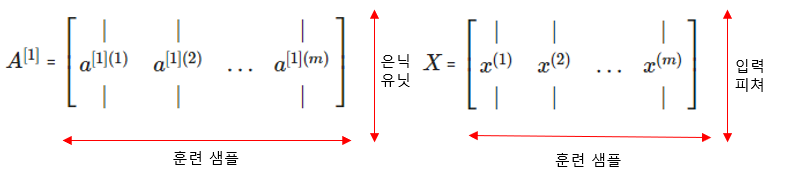 <br>
행렬 왼쪽 위의 첫 값은 첫번째 hidden layer의 첫 훈련 샘플의 활성값이다. <br>
아래로 내려갈수록 훈련 샘플의 hidden layer가 바뀌는것이다. <br>
즉, 세로는 은닉 유닛의 번호가 되는것이고, <br>
가로 이동은 은닉 유닛이 고정되고 훈련샘플만 바뀌는것이다. <br><br>
행렬 $X$도 가로는 훈련 샘플들을 의미하고 세로는 각각의 입력 피쳐를 의미한다.<br>
<br>


 $Z^{[1]} = W^{[1]}X + b^{[1]}$ <br>
 $A^{[1]} = σ(Z^{[1]})$ <br>
 $Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$ <br>
 $A^{[2]} = σ(Z^{[2]})$ <br><br>

위와 같은 공식으로 이제 여러 샘플에 대해 신경망을 Vectorization 할수있다. <br>
다음 파일에서 이것이 어떻게 Vectorization의 정확한 구현인지 살펴볼수있다. <br> <br>



--- 

참조 : https://youtu.be/xy5MOQpx3aQ